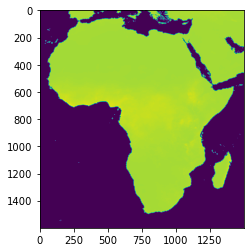

<AxesSubplot:>

In [14]:
import rioxarray
from rioxarray import merge
from rasterio.plot import show
from pyproj import Transformer
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

items = [
r'data.2022.040506.tiff',
r'data.2022.030405.tiff',
r'data.2022.020304.tiff',
r'data.2022.010203.tiff']

elements = []

#for val in items:
#    elements.append(rioxarray.open_rasterio(val))


for val in items:
    rds = rioxarray.open_rasterio(val)
    if rds.rio.crs != "EPSG:4326":
        rds = rds.rio.reproject("EPSG:4326")
    elements.append(rds)


merged = merge.merge_arrays(elements, nodata=0.0)

image = merged.values
show(image)

In [15]:
merged

<xarray.DataArray (band: 1, y: 1600, x: 1500)>
array([[[-9999.      , -9999.      , -9999.      , ...,    35.593346,
            33.86217 ,    32.04727 ],
        [-9999.      , -9999.      , -9999.      , ...,    36.565857,
            36.04242 ,    33.63808 ],
        [-9999.      , -9999.      , -9999.      , ...,    36.836056,
            35.167736,    33.3798  ],
        ...,
        [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
         -9999.      , -9999.      ],
        [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
         -9999.      , -9999.      ],
        [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
         -9999.      , -9999.      ]]], dtype=float32)
Coordinates:
  * x            (x) float64 -19.97 -19.92 -19.87 -19.82 ... 54.88 54.93 54.98
  * y            (y) float64 39.97 39.92 39.87 39.82 ... -39.88 -39.93 -39.98
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    _FillValue:    0.0

In [16]:
merged.rio.to_raster('merged_africa_n4.tiff')

In [17]:
#raster_array = merged.astype('float64')
import rioxarray as rxr
import cartopy.feature as cfeature


In [18]:
raster = rxr.open_rasterio('merged_africa_n4.tiff', masked=True)
raster_array = raster.astype('float64')

In [19]:
raster_array

<xarray.DataArray (band: 1, y: 1600, x: 1500)>
array([[[-9999.        , -9999.        , -9999.        , ...,
            35.59334564,    33.86217117,    32.04727173],
        [-9999.        , -9999.        , -9999.        , ...,
            36.56585693,    36.04241943,    33.6380806 ],
        [-9999.        , -9999.        , -9999.        , ...,
            36.83605576,    35.16773605,    33.37979889],
        ...,
        [-9999.        , -9999.        , -9999.        , ...,
         -9999.        , -9999.        , -9999.        ],
        [-9999.        , -9999.        , -9999.        , ...,
         -9999.        , -9999.        , -9999.        ],
        [-9999.        , -9999.        , -9999.        , ...,
         -9999.        , -9999.        , -9999.        ]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -19.97 -19.92 -19.87 -19.82 ... 54.88 54.93 54.98
  * y            (y) float64 39.97 39.92 39.87 39.82 ... -39.88 -39.93 -39.98
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [20]:
x, y = np.meshgrid(raster["x"], raster["y"])
crs = ccrs.UTM("18")

transformer = Transformer.from_crs(raster.rio.crs, "EPSG:4326", always_xy=True)
lon, lat = transformer.transform(x, y)
raster.coords["lon"] = (("y", "x"), lon)
raster.coords["lat"] = (("y", "x"), lat)

/home/ozlem/anaconda3/envs/geocat/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ozlem/anaconda3/envs/geocat/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


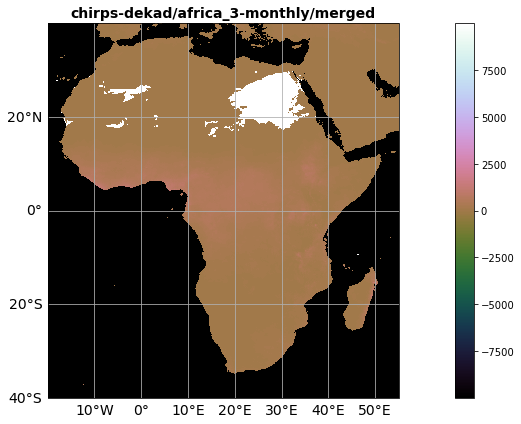

In [27]:
fig = plt.figure(figsize=(16, 6))


#greyscale = raster.mean(dim="band")

# Plot on a map
ax = plt.subplot(projection=ccrs.PlateCarree())
raster.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="cubehelix",
    shading="auto",
    add_colorbar=True,
)



g1 = ax.gridlines(draw_labels = True)
g1.xlabel_style = {'size': 14, 'color': 'k'}
g1.ylabel_style = {'size': 14, 'color': 'k'}


g1.xlabels_top = False
g1.ylabels_right = False



plt.title("chirps-dekad/africa_3-monthly/merged",fontweight='bold', size=14)

plt.tight_layout()

plt.show()

In [29]:
#geom_dem, info = mask (raster_array, [geom],  crop=True, invert=False, all_touched=False) 
